# Class 14: Interactive Data visualizations

Plan for today:
- Quick review of seaborn
- Discuss interactive graphics using plotly 
- If there is time: Discuss creating maps


In [177]:
import YData

# YData.download.download_class_code(14)   # get class code    
# YData.download.download_class_code(14, True)  # get the code with the answers 

YData.download_data("dennys.csv")

YData.download.download_data("States_shapefile.geojson")
YData.download.download_data("state_demographics.csv")
YData.download.download_data("ne_110m_graticules_10.prj")
YData.download.download_data("ne_110m_graticules_10.shp")
YData.download.download_data("ne_110m_graticules_10.shx")
YData.download.download_data("ne_110m_graticules_10.dbf")


The file `dennys.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `States_shapefile.geojson` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `state_demographics.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.prj` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.shp` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.shx` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `ne_110m_graticules_10.dbf` already exists.
If you would like to download a new copy of the file, 

In [178]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Review of seaborn!

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

I.e., it is built on top of of matplotlib but produces better looking plots that are easier to create. 

Let's start by examining different themes which can produce better looking plots. We can do this using the `sns.set_theme()` method. 


In [180]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()   # default style is 'darkgrid')
#sns.set_theme(style='whitegrid')

# Side note: Matplotlib also has themes
# plt.style.available
# plt.style.use('fivethirtyeight')


### Penguins!  

Let's get a little more practice with seaborn by continuing to explore the penguins data set. 



In [181]:
# Let's look at some penguins
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Plotting a single quantitative variable using sns.displot()

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


#### Warm-up exercise 1 

Please create a `sns.displot()` to create a visulation of *flipped length*, where each *species* is in a different color (i.e., different hue). Also, experiment with the "kind" of visualization and choose the kind you think creates the best visualization. 


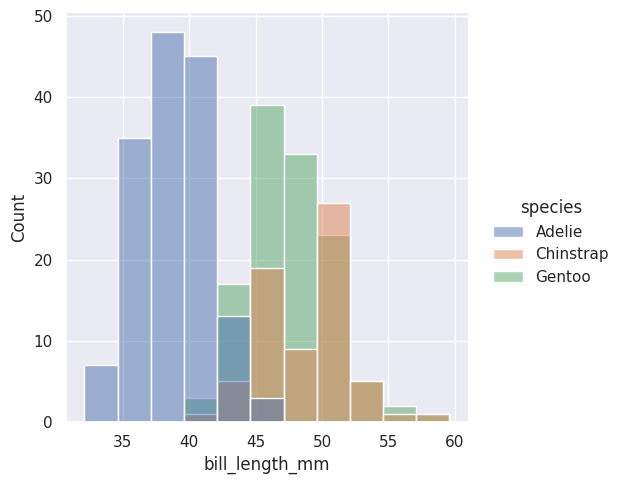

In [182]:
# plot the flipper length
sns.displot(data = penguins, 
            x="bill_length_mm", 
            hue="species", 
            kind="hist");  # Experiment with "hist", "kde" and "ecdf"

### Pairs plots

One of the most useful visualizations for exploring the relationships between several quantitative variables is to create a "pairs plot" which creates a series of scatter plots between all quantitative variables in the data.  We can do this in seaborn using the `sns.pairplot(data)` function!

#### Warm-up exercise 2 

Use the `pairplot()` function to visualize the relationships between all columns in the `penguins` DataFrame. Also, make each species have a different color. 



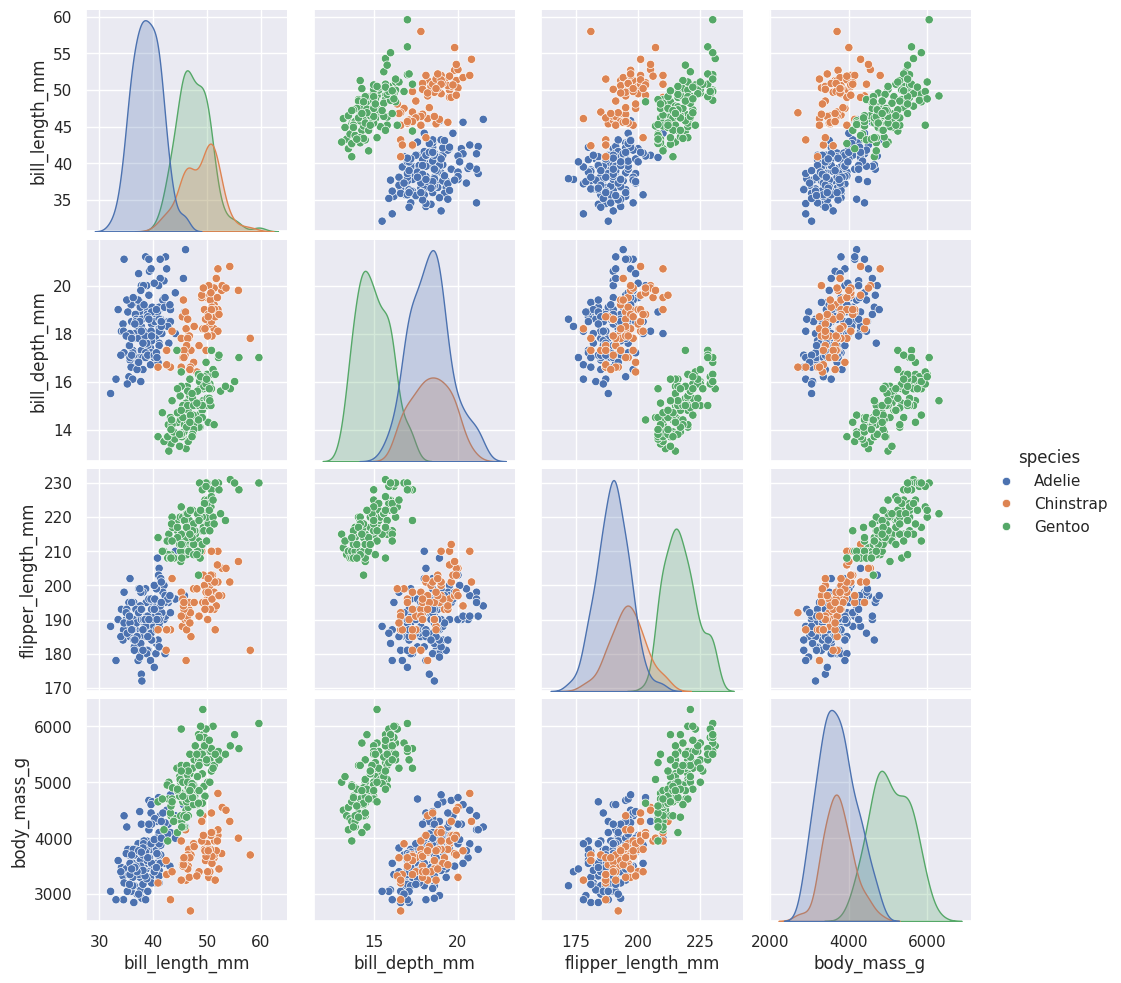

In [183]:
# Create pair plots for the different varaibles in the penguins data set

sns.pairplot(penguins, hue = "species");


<img src = "https://i.imgflip.com/1ezfdq.jpg">

## Interactive data visualizations with plotly

Let's now look at interactive visualizations using the [plotly express package](https://plotly.com/python/plotly-express/). 

Interactive visualizations can't be used with statitic report (such as the pdf used for your class project) but they are useful for exploring data to understand key trends, and these types of graphics can be embedded in webpages. 

Let's start with our favoriate data set to visualize, the gapminder data! The gapminder data comes with the plotly package and can be loaded using the code below.



In [184]:
import plotly.express as px

gapminder = px.data.gapminder()   # the plotly package comes with the gapminder data

print(type(gapminder))

gapminder.head(3)

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4


Let's now get the the gapminder data from 2007. As you know, we can do this using Boolean masking. We can also do this using the `.query()` method!


In [185]:
# Get the gapminder data from only 2007

gapminder_2007 = gapminder[gapminder['year'] == 2007]

gapminder_2007_alt = gapminder.query("year==2007")

gapminder_2007.equals(gapminder_2007_alt)


True

### Line plots

Let's create a line plot showing life expectancy as a function of the year using the `px.line()` method. In particular, let's set the followign properties of the plot: 

- `x`: Year
- `y`: Life expectancy
- `color`: The continent
- `line_group`: The country
- `hover_name`: The country
- `line_shape`: spline
- `render_mode`: svg to use svg graphics

What do you think of this plot? 


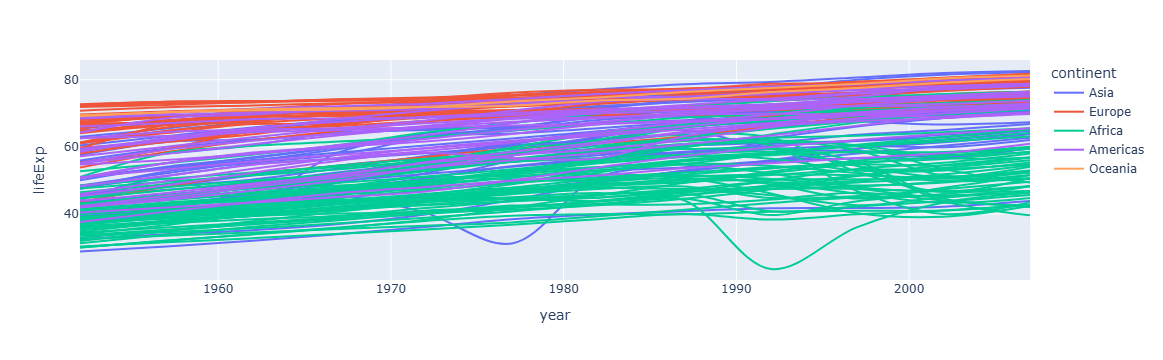

In [186]:
# Create an interactive line plot

fig = px.line(gapminder, x="year", y="lifeExp", 
              color="continent", 
              line_group="country", 
              hover_name="country",
              line_shape="spline", 
              render_mode="svg")

fig.show()

### Scatter plots

Let's now recreate our scatter plot of country life expectancy as a function of GDP per capita using the `gapminder_2007` data using plotly. In particularly, we can use the `px.scatter(data_frame = , x = , y = , ...)` method which works similar to seaborn's `sns.relplot()` function. 

Let's try out the `px.scatter(data_frame = , x = , y = , ...)` function use the following mappings: 

- `x`: GDP per capita
- `y`: Life Expectancy
- `size`:  The country population
- `color`: Continent 

We can also set the following properties:

- `hover_name`: The name of the country
- `log_x`: Set it to True to make the x-axis on a log10 scale
- `max_size`: Set it to 60 to make the scaling for the population display better

Finally, if we want to have separate facets for columns we can use `facet_col`.



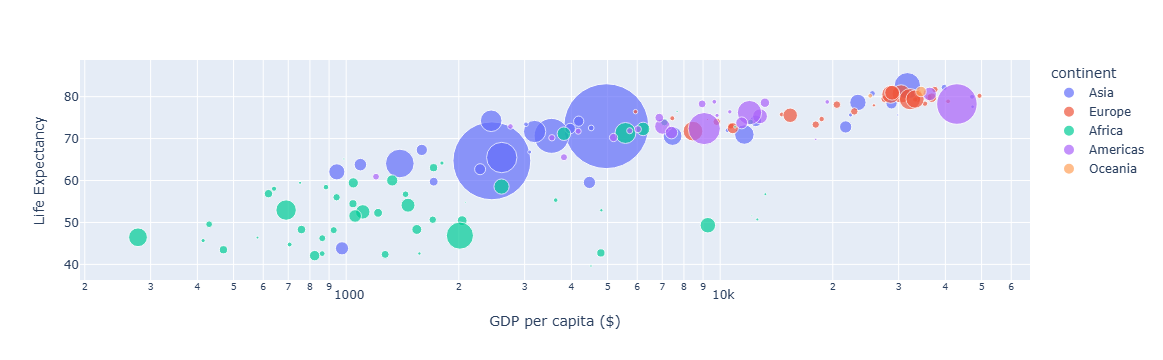

In [187]:
# Create a scatter plot in plotly

fig = px.scatter(data_frame = gapminder_2007, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 size="pop", 
                 color="continent",
                 hover_name="country", 
                 log_x=True, 
                 size_max=60)


# Add axis labels
fig.update_layout(xaxis_title="GDP per capita ($)",
                 yaxis_title="Life Expectancy")


fig.show()

### Animations

We can also add animations to out plots using the following arguments:

- `animation_frame`: defines which variable to animate over; i.e., each frame in the animation will be one value of this variable.

- `animation_group`: Values from this column or array_like are used to provide object-constancy across animation frames: rows with matching `animation_group`s will be treated as if they describe the same object in each frame. This allows the animation to smoothly interpolate between frames. 

We can also set the x and y ranges of our plots to match the ranges of data over the full animation sequence. 

- `range_x`: The range that the x-values should take
- `range_y`: The range that the y-values should take


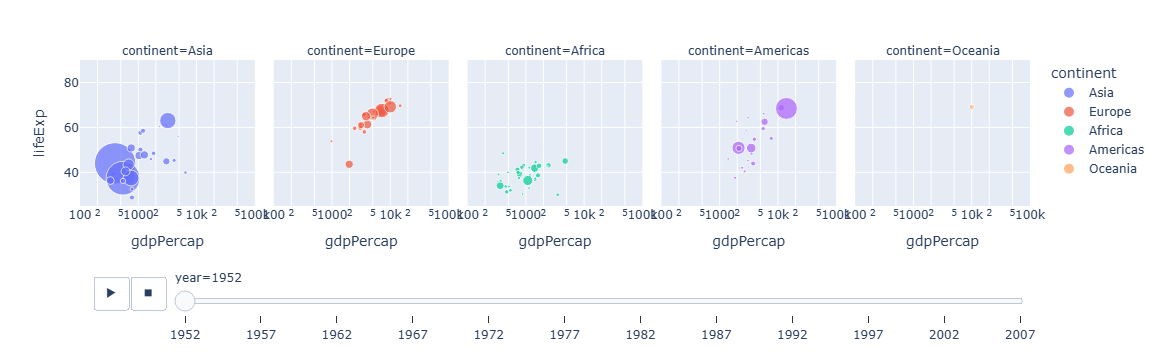

In [188]:
# Create an animated scatter plot

fig = px.scatter(gapminder, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country", 
                 facet_col="continent",
                 log_x=True, 
                 size_max=45, 
                 range_x=[100,100000], 
                 range_y=[25,90])


fig.show()

### Additional visualizations

There are a number of other visualizations we can create using plotly. Let's briefly explore line graphs, sunburst plots and treemaps. 

Please see the plotly express documentation to learn more about other plots you can create:  https://plotly.com/python/plotly-express/



#### Sunburst plots

Sunburst is a generalization of a pie chart for data that has a hierarchical structure; i.e., it can plot categorical data that has a hierarchical structure.

Let's create a sunburst plot showing how much of the world's population is in each continent at the inner level, and then each country within each continent at the outer level. In particular, let's set the following properties:

- `path`: Should be a list with continent at the inner level and country at the outer level.
- `values`: Should specify that the size of each segment is given by the countries population 
- `color`: Set to the countries' life expectancies


What do you think of this plot? 


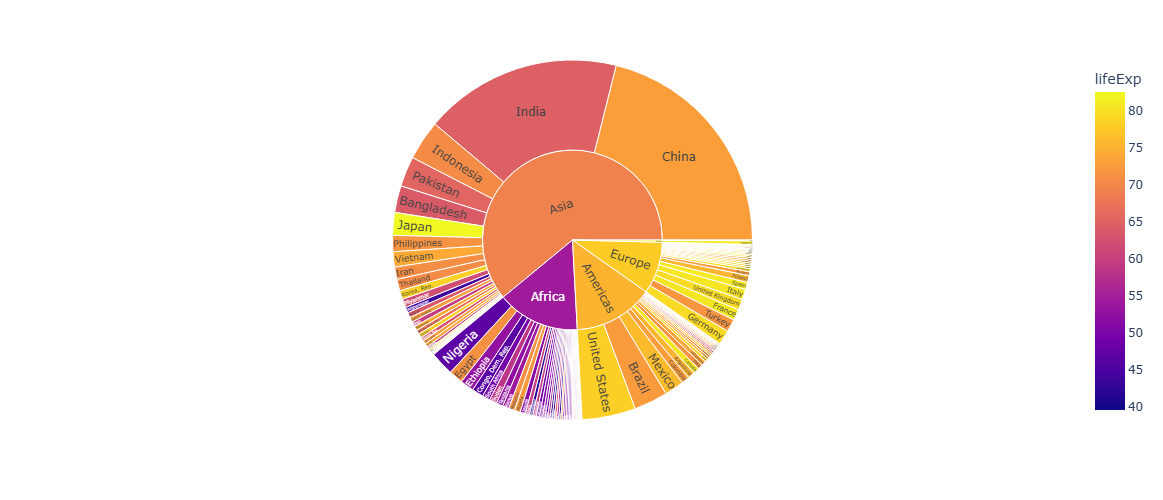

In [189]:
# Create a sunburst plot

fig = px.sunburst(gapminder_2007, 
                  path=['continent', 'country'], 
                  values='pop', 
                  color='lifeExp')

fig.update_layout(width = 500, height = 500)

#### Treemap

Treemaps allow one to view hierarchical relationships by creating a sequence of nested rectangles. We can use plotly's `px.treemap()` function to create interactive tree maps.

Let's create an interactive treemap showing the population of each country separately for each continent, as well as color each country based on the average life expectancy. In particular, let's set the following properties:

- `path`: Should be a list with continent at the highest level and country nested within continent. We can also set the first argument of the list to be `px.Constant('world')` so that at the highest level we get the label "world". 
- `values`: Should specify that the size of each rectangle is equal to a country's population 
- `color`: Set to the countries' life expectancies

What do you think of this plot? 


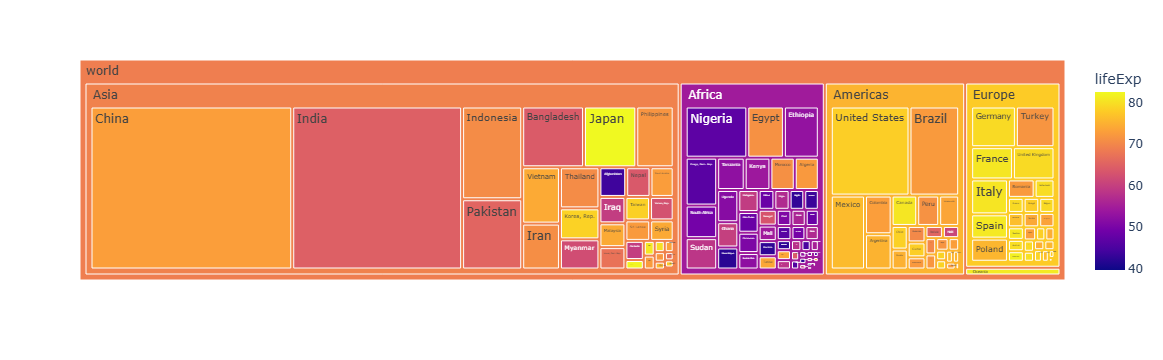

In [190]:
# Create a treemap

fig = px.treemap(gapminder_2007, 
                 path=[px.Constant('world'), 'continent', 'country'], 
                 values='pop', 
                 color='lifeExp')
                 #color='gdpPercap')

fig.show()

## Pivot tables and heatmaps

Heatmaps allow us to view data that is a function of two variables. 

In order to create a heatmap, we first need first transformat out data into a DataFrame that has appropirate rows and columns. One way we can do this is to use the pandas `.pivot_table(index = , columns = , values = , aggfunc = )` method, where the arguments to this method are:

- `index`: The variable we want in the rows of out DataFrame
- `columns`: The variable we want in the columns of our DataFrame
- `values`: The values we want to be in the DataFrame
- `aggfunc`: The function we will use to aggregate our data 

Let's apply the `.pivot_table()` method to our gapmider data to create a DataFrame called `gapminder_continent_wide` where:

- The rows are the different continents
- The columns are the year
- The values in the DataFrame are the average life expectancy (For each continent in each year)


In [191]:
# Generate a pivot table from the gapminder data

gapminder_continent_wide = gapminder.pivot_table(index = 'continent', 
                                                 columns = 'year', 
                                                 values = 'lifeExp', 
                                                 aggfunc = 'mean')
gapminder_continent_wide.head()

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


Now that we have the appropriate DataFrame, let's use the plotly `imshow()` function to visualize it!

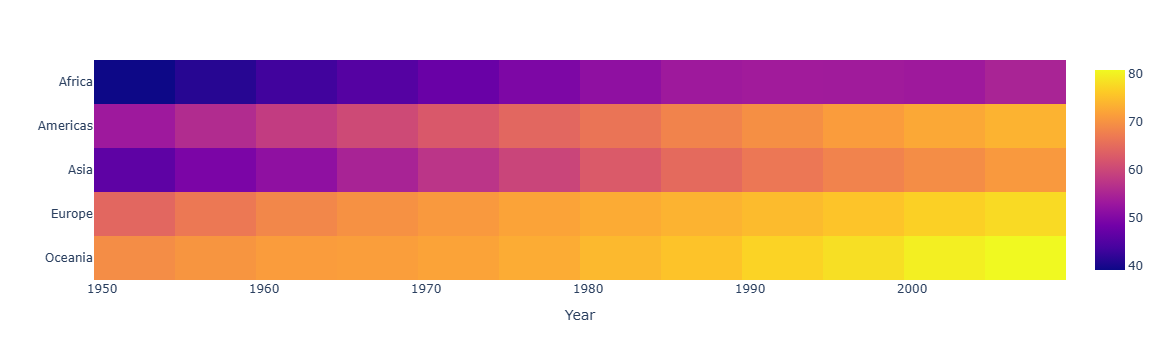

In [192]:
# use plotly imshow() to visualize the pivot table

fig = px.imshow(gapminder_continent_wide)

fig.update_layout(xaxis_title = "Year", yaxis_title = "")

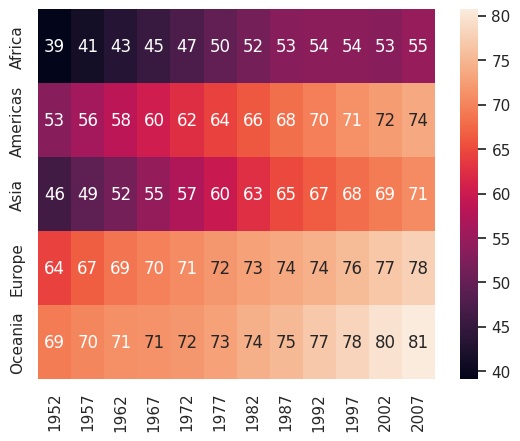

In [193]:
# We can create heatmaps in seaborn as well

g = sns.heatmap(gapminder_continent_wide, 
                annot=True, 
                fmt=".0f");

g.set_xlabel("");
g.set_ylabel("");

## 1. Spatial mapping with geopandas

Visualizing spatial data through maps is another powerful way to see trends in data. There are several mapping packages in Python. Here we will use the geopandas package to create maps. 

The geopandas package defines a geopandas DataFrame, which is the same as a pandas DataFrame but has an additional column called `geometry` which specifies geographic information. 

Let's explore this now!


### Visualizing boundaries

Let's start by looking some geopanda DataFrames and visualizing some geometric boundaries.

Below we load the geopandas as gpd

In [194]:
import geopandas as gpd


Let's get a geopandas DataFrame that has the countries in the world...

In [195]:
# View the world geopandas DataFrame

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)


# print the data type
print(type(world))

# look at the first few rows of the data
world.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


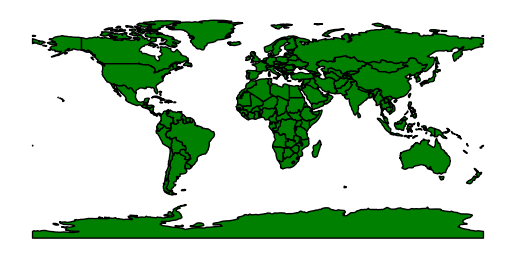

In [196]:
# Plot a world map with particular properties

ax = world.plot(color = "green", edgecolor = "black");

ax.set_axis_off();


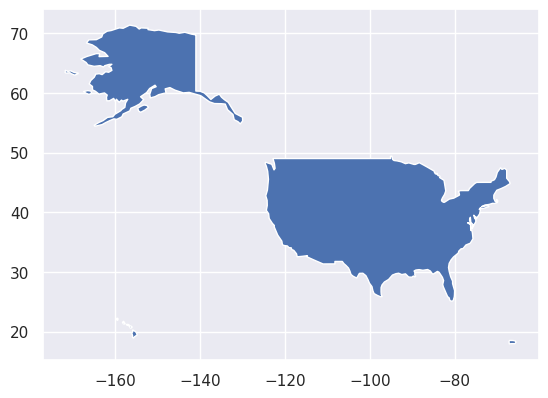

In [197]:
# Plot just the United States

world.query("SOVEREIGNT	== 'United States of America'").plot();


### Coordinate reference systems and projections

A coordinate reference system (CRS) is a framework used to precisely measure locations on the surface of the Earth as coordinates. The goal of any spatial reference system is to create a common reference frame in which locations can be measured precisely and consistently as coordinates, which can then be shared unambiguously, so that any recipient can identify the same location that was originally intended by the originator.

There are two different types of coordinate reference systems: Geographic Coordinate Systems and Projected Coordinate Systems. [Projected coordinate systems](https://en.wikipedia.org/wiki/List_of_map_projections) map 3D coordinates into a 2D plane so they can be plotted. Different projected coordiate systems perserve different properties, such as keeping all angles intact which is usefor for navigation (e.g., the Mercator projection) or keeping the size of land areas intact (e.g., the Eckert IV projection). 

A detailed discussion of CRS is beyond the scope of the class. But for the purposes of this class, it is just important that all layers in a map are using the same project (otherwise, for example, data points representing cities and the underlying spatial map won't line up). 

Let's very briefly explore different map projections... 


In [198]:
# Read Graticules (lines on a map)
graticules = gpd.read_file("ne_110m_graticules_10.shp")
print(graticules.crs)
graticules.head(3)

EPSG:4326


,degrees,direction,display,dd,ScaleRank,geometry
0,80,N,80 N,80.0,6,"LINESTRING (180 79.99848, 179.99664 79.99848, ..."
1,70,N,70 N,70.0,6,"LINESTRING (180 69.99847, 179.99664 69.99847, ..."
2,60,N,60 N,60.0,6,"LINESTRING (180 59.99866, 179.99664 59.99866, ..."


EPSG:4326


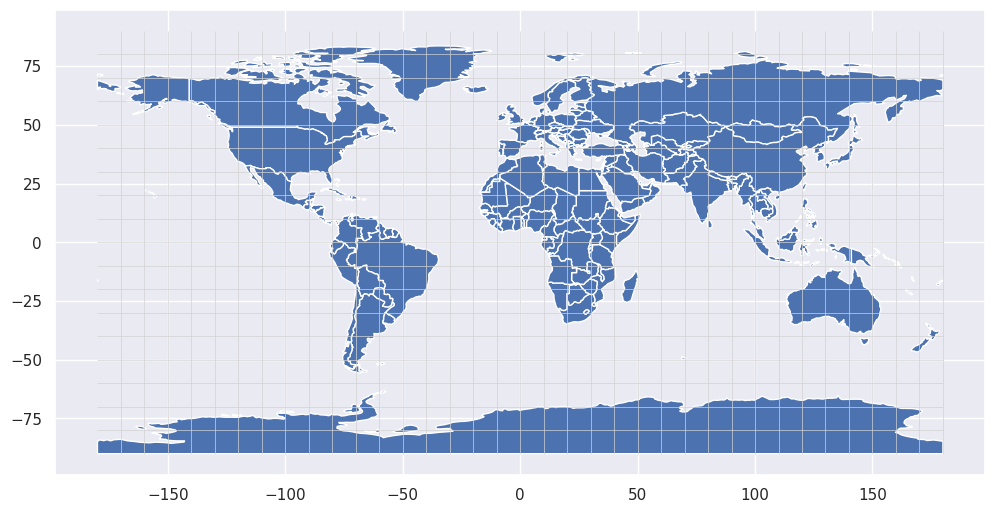

In [199]:
# Web Mercator projection - perserves angles (EPSG:4326 projection)

print(world.crs) # print the default CRS


# plot the map
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax = ax);
graticules.plot(ax=ax, color="lightgray", linewidth=0.5);

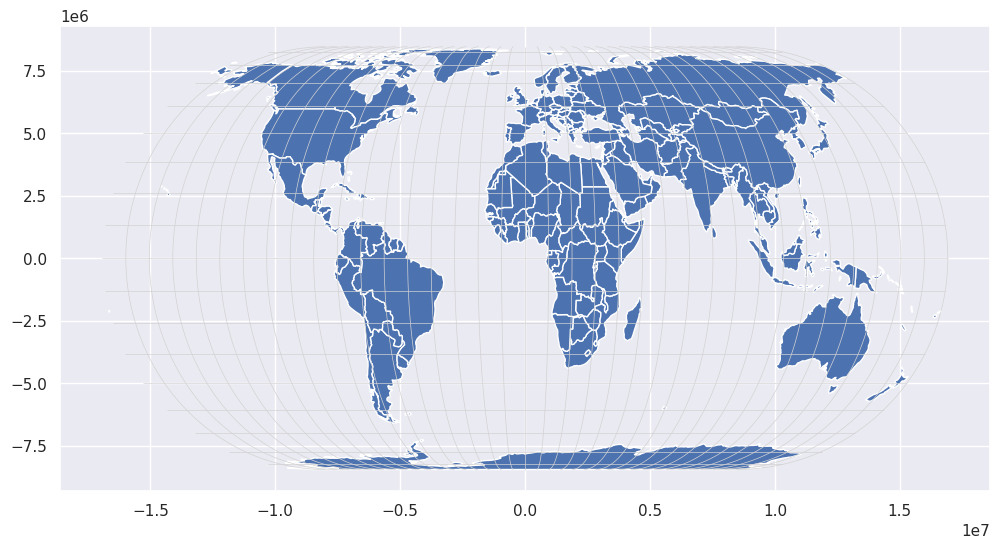

In [200]:
# Eckert IV is an equal-area projection  ("ESRI:54012")

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54012").plot(ax = ax);
graticules.to_crs("ESRI:54012").plot(ax=ax, color="lightgray", linewidth=0.5);

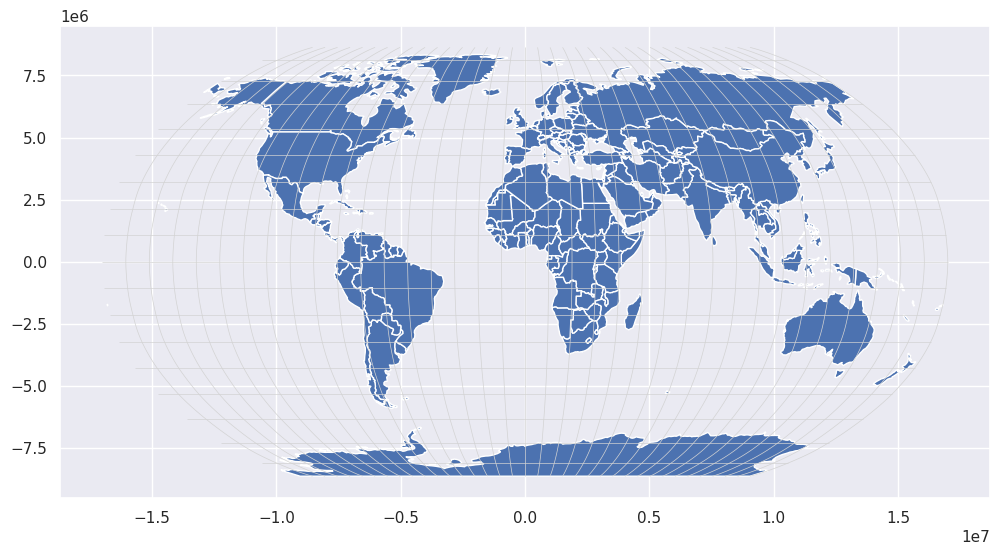

In [201]:
# Robinson projection - neither equal-area nor conformal ("ESRI:54030") 

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54030").plot(ax = ax);
graticules.to_crs("ESRI:54030").plot(ax=ax, color="lightgray", linewidth=0.5);

To learn more about "What your favorite map projection says about you" see: https://xkcd.com/977/

### Maps with layers and markers

We can also plot points on a map. When doing so, it's important that the points and the underlying map use the same coordinate reference system (CRS).

Let's add Denny's locations to the map of the United States!


In [202]:
# Let's start by getting a map of just the United States

state_map = world.query("SOVEREIGNT == 'United States of America'")

state_map

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
45,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,1,Puerto Rico,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-66.28243 18.51476, -65.7713 18.4266..."


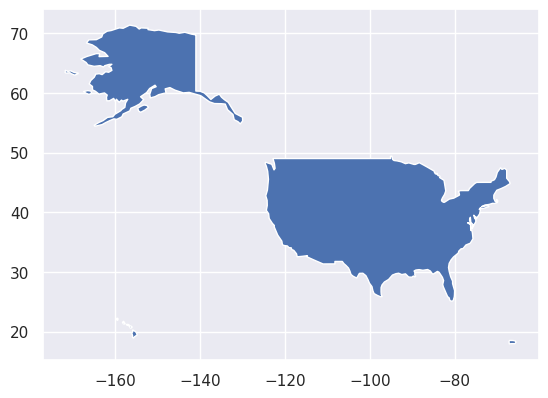

In [203]:
# visualize just the United States

state_map.plot();


In [204]:
# Get the coordinate reference system (CRS) for our map

print(state_map.crs)

EPSG:4326


Let's now load our Denny's data!

In [205]:
# Let's load our Denny's data
dennys = pd.read_csv("dennys.csv")
dennys.head(3)

,Unnamed: 0,address,city,state,zip,longitude,latitude
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366


To convert longitude and latitude coordinates into geometric objects; i.e., we will convert them into Shaply objects.  We can use the `gpd.points_from_xy(long, lat)` function. 

In [206]:
# Let's convert our longitude and latitude coordinates into geometric (Shapely) objects 

dennys_geometries = gpd.points_from_xy(dennys["longitude"], dennys["latitude"])
dennys_geometries[0:5]

<GeometryArray>
[<POINT (-149.877 61.195)>,  <POINT (-149.809 61.21)>,
  <POINT (-147.76 64.837)>,  <POINT (-85.468 32.603)>,
  <POINT (-86.832 33.562)>]
Length: 5, dtype: geometry

In [207]:
# Let's now convert out data into a geopandas DataFrame

dennys_gpd = gpd.GeoDataFrame(dennys, geometry=dennys_geometries)
dennys_gpd.head(3)

,Unnamed: 0,address,city,state,zip,longitude,latitude,geometry
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953,POINT (-149.8767 61.1953)
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097,POINT (-149.809 61.2097)
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366,POINT (-147.76 64.8366)


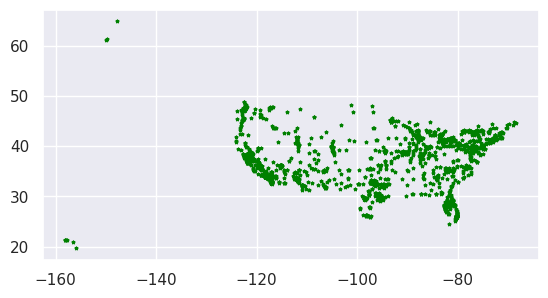

In [208]:
# We can plot the location of the Denny's using the plot function

dennys_gpd.plot(marker='*', color='green', markersize=5);


In [209]:
# Let's check the CRS

print(dennys_gpd.crs)


None


Before plotting data, we should set the appropriate coordinate reference system (CRS). This is partlcularly imporant when we are combining different layers on a map, such as putting city locations on the map that has the outlines of regional borders. 

The CRS that uses longitude and latitude coordinates is the [World Geodetic System 1984 (WGS84)](https://epsg.io/4326). This system is often referred to by its EPSG Geodetic Parameter Dataset code which is `4326`. 

Thus, we should set the set coordinate system to be EPSG 4326. We can do this using the method `.set_crs(4326)`. Let's set this on our `dennys_gpd` DataFrame. 


In [210]:
# Let's set the CRS to match the CRS of our map (which is EPSG 4326)

dennys_gpd = dennys_gpd.set_crs(4326)

print(dennys_gpd.crs)

dennys_gpd.head(3)

EPSG:4326


,Unnamed: 0,address,city,state,zip,longitude,latitude,geometry
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953,POINT (-149.8767 61.1953)
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097,POINT (-149.809 61.2097)
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366,POINT (-147.76 64.8366)


Now that we have our Denny's location in the same coordinate system as our map, we can add the points to the map. 

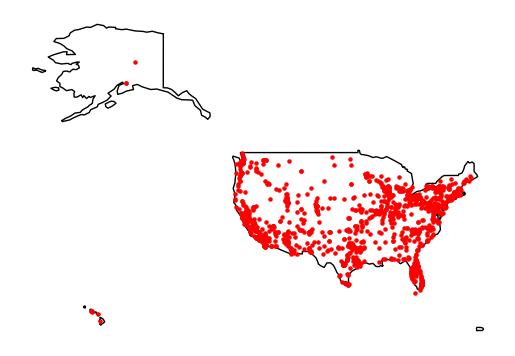

In [211]:
#state_map = gpd.read_file("States_shapefile.geojson")

base = state_map.plot(color='white', edgecolor='black')

ax = dennys_gpd.plot(ax=base, color='red', markersize=5);

ax.set_axis_off();

In [212]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_14_answers.ipynb --cache-refresh --to pdf 